In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageDraw,ImageStat
from IPython.display import display, clear_output, HTML
import PIL
import matplotlib.image as mpimg
from IPython.display import Image as Im
from IPython.display import display
from tqdm import tqdm

In [3]:
citypath = '2020_11_02_01_22_citymap/log.txt'
circlepath = '2020_11_02_01_36_circle/log.txt'

In [4]:
df_circle = pd.read_csv(circlepath,names = ['x','y','z'])
df_city = pd.read_csv(citypath,names = ['x','y','z'])

# Circle for the roundabout near spawn point

(-70.0, 20.0)

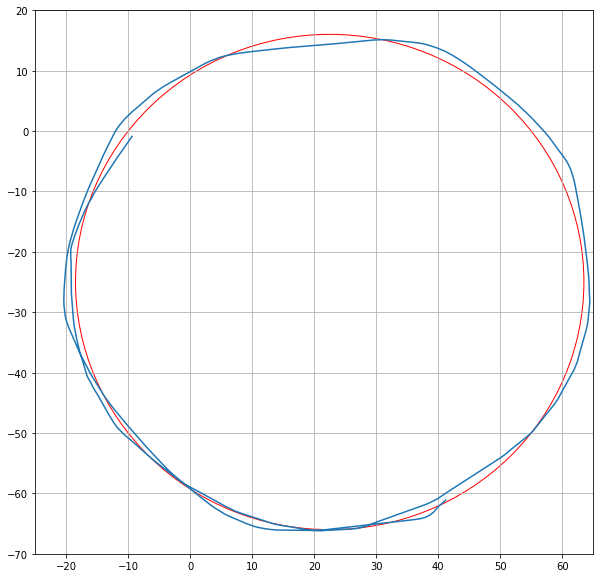

In [64]:
# Circle 
fig, ax = plt.subplots(figsize = (10,10))
circle = plt.Circle((22.5, -25), 41, color='red', fill = False)

ax.add_artist(circle)
ax.plot(df.x,df.y)

ax.grid()
plt.xlim(-25,65)
plt.ylim(-70,20)

In [94]:
def dist_from(center, r, point):
    return abs(((((point[0] - center[0])** 2) + ((point[1] - center[1])** 2))**(1/2)) - r)

distance = 41


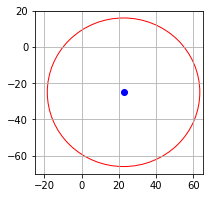

In [95]:
point = central

fig, ax = plt.subplots(figsize = (3,3))
central = (22.5, -25)
radius = 41
circle = plt.Circle(central, radius, color='red', fill = False)
ax.add_artist(circle)
plt.xlim(-25,65)
plt.ylim(-70,20)
ax.grid()

print('distance = %d' % dist_from(central,radius,point))
plt.plot(point[0],point[1], 'bo')

distance = 16


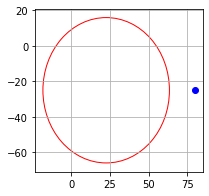

In [92]:
point = [80, central[1]]

fig, ax = plt.subplots(figsize = (3,3))
central = (22.5, -25)
radius = 41
circle = plt.Circle(central, radius, color='red', fill = False)
ax.add_artist(circle)
ax.plot(point[0],point[1], 'bo')

plt.xlim(min(central[0]-radius-5,point[0]-5),max(central[0]+radius+5,point[0]+5))
plt.ylim(min(central[1]-radius-5,point[1]-5),max(central[1]+radius+5,point[1]+5))

ax.grid()

print('distance = %d' % dist(central,radius,point))

plt.show()

# City from just driving around

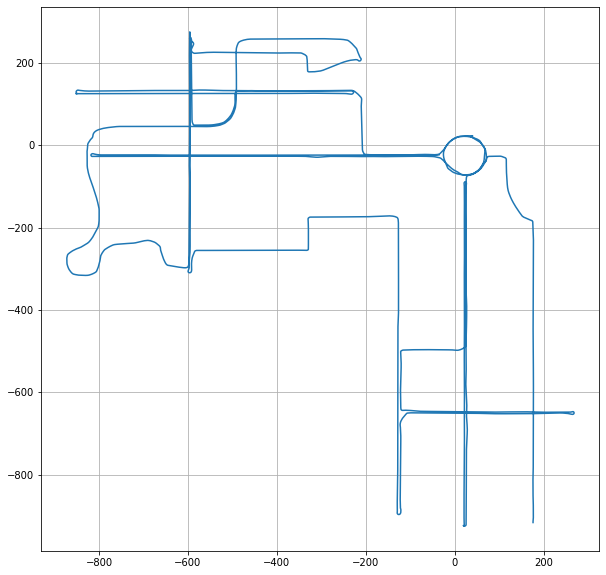

In [102]:
# City mapped out by driving
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(df_city.x,df_city.y)
ax.grid()

# DQN Roundabout

In [74]:
dqn_df = pd.read_csv('2020_11_02_20_44_dqn/log.txt',names=['x','y','speed','reward_speed','reward_dist','reward'])
dqn_df2 = pd.read_csv('2020_11_02_21_43_dqn/log.txt',names=['x','y','speed','reward_speed','reward_dist','reward'])
dqn_df_lr = pd.read_csv('2020_11_02_22_29_dqn/log.txt',names=['x','y','speed','reward_speed','reward_dist','reward'])

In [35]:
print(dqn_df.shape)
print(dqn_df2.shape)
print(dqn_df_lr.shape)

(4878, 6)
(9105, 6)
(3389, 6)


(4878, 6)


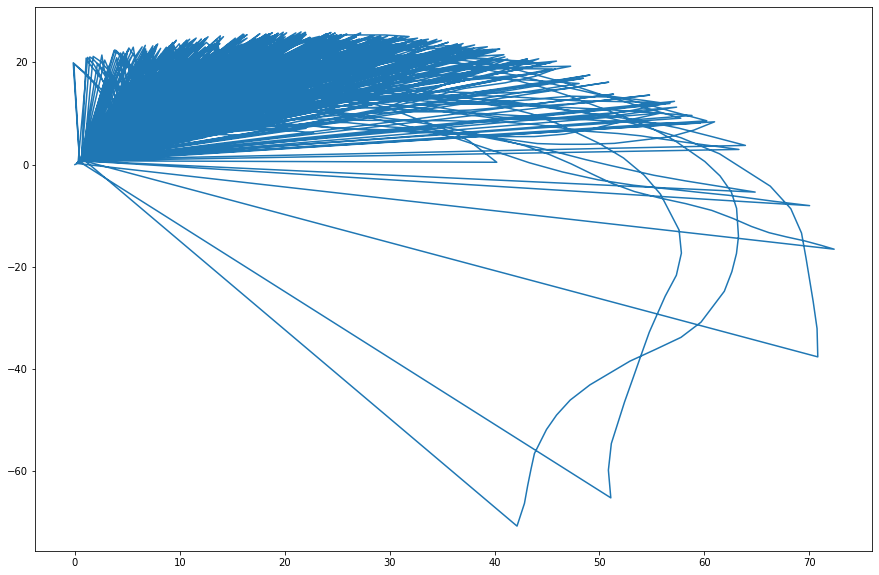

In [36]:
print(dqn_df.shape)
plt.figure(figsize = (15,10))
#plt.plot(dqn_df.reward)
plt.plot(dqn_df.x,dqn_df.y)

(9105, 6)


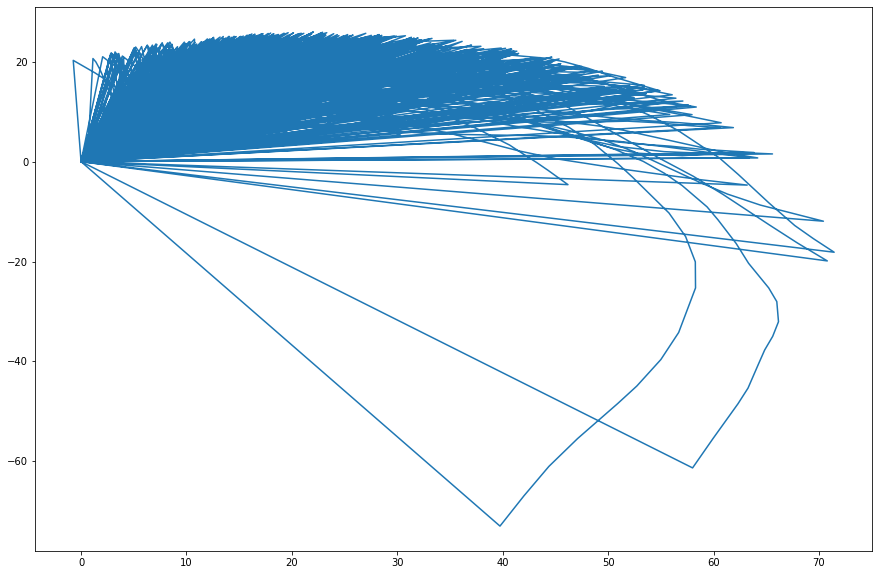

In [37]:
print(dqn_df2.shape)
plt.figure(figsize = (15,10))
#plt.plot(dqn_df.reward)
plt.plot(dqn_df2.x,dqn_df2.y)

(3389, 6)


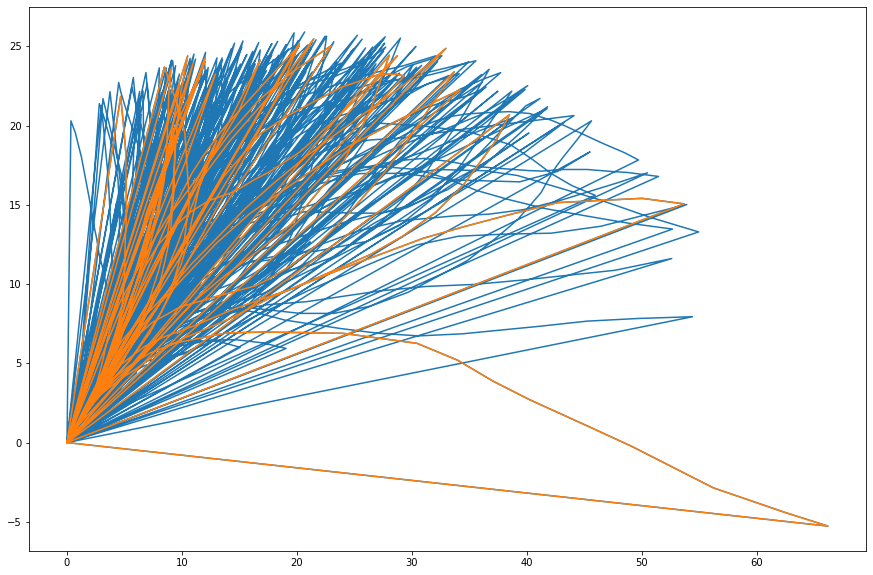

In [81]:
print(dqn_df_lr.shape)
plt.figure(figsize = (15,10))
plt.plot(dqn_df_lr.x,dqn_df_lr.y)

plt.plot(dqn_df_lr.iloc[2800:3200].x,dqn_df_lr.iloc[2800:3200].y)

In [76]:
def car2pol(x,y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

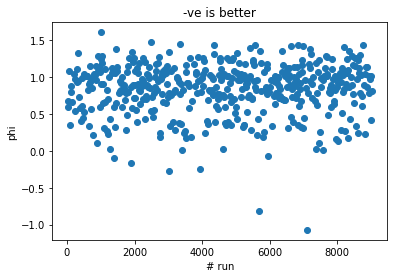

In [72]:
this_df = dqn_df2
lr_idx = this_df[(this_df.x == 0) & (this_df.reward == 0)].index
lr_phi = [car2pol(i,j)[1] for i,j in zip(this_df.iloc[lr_idx-1].x,this_df.iloc[lr_idx-1].y)]
plt.scatter(list(lr_idx), lr_phi)
plt.xlabel('# run')
plt.ylabel('phi')
plt.title ('-ve is better')
plt.show()

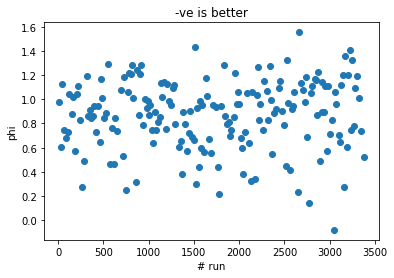

In [78]:
this_df = dqn_df_lr
lr_idx = this_df[(this_df.x == 0) & (this_df.reward == 0)].index
lr_phi = [car2pol(i,j)[1] for i,j in zip(this_df.iloc[lr_idx-1].x,this_df.iloc[lr_idx-1].y)]
plt.scatter(list(lr_idx), lr_phi)
plt.xlabel('# run')
plt.ylabel('phi')
plt.title('-ve is better')
plt.show()

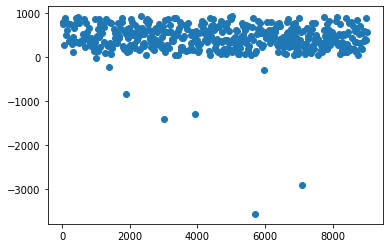

In [55]:
this_df = dqn_df2
lr_idx = this_df[(this_df.x == 0) & (this_df.reward == 0)].index
plt.scatter(lr_idx,this_df.iloc[lr_idx-1].x + this_df.iloc[lr_idx-1].y)

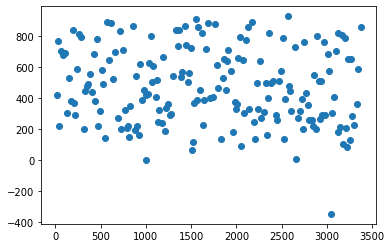

In [54]:
this_df = dqn_df_lr
lr_idx = this_df[(this_df.x == 0) & (this_df.reward == 0)].index
plt.scatter(lr_idx,this_df.iloc[lr_idx-1].x * this_df.iloc[lr_idx-1].y)